In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# 데이터 로딩
df = pd.read_csv("C:\\Users\\LG\\Downloads\\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
# 컬렴명 확인
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
# 결측치 확인
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

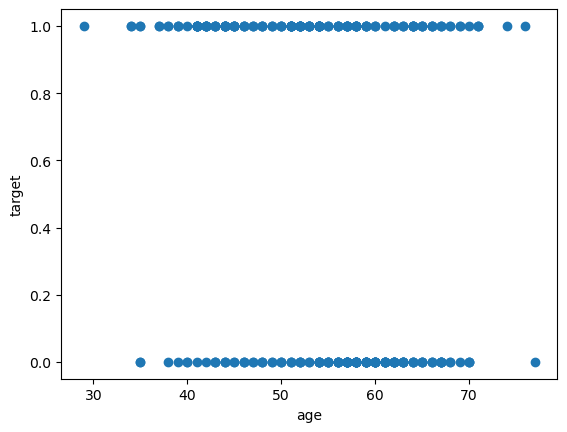

In [30]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['age'], df['target'])
plt.xlabel('age')
plt.ylabel('target')

plt.show()

In [32]:
X = df.drop('target', axis=1)
y = df['target'].astype(int)

In [34]:
# 3. 입력 변수 중 일부 원핫 인코딩
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [58]:
from keras import Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))        
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
# 7. 컴파일
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
# 8. 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5549 - loss: 0.6947 - val_accuracy: 0.7143 - val_loss: 0.6167
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7658 - loss: 0.5550 - val_accuracy: 0.7347 - val_loss: 0.5624
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8213 - loss: 0.5009 - val_accuracy: 0.7347 - val_loss: 0.5166
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8093 - loss: 0.4639 - val_accuracy: 0.7347 - val_loss: 0.4807
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7778 - loss: 0.4543 - val_accuracy: 0.7755 - val_loss: 0.4531
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8430 - loss: 0.3844 - val_accuracy: 0.7755 - val_loss: 0.4288
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8576 - loss: 0.3740 - val_accuracy: 0.8163 - val_loss: 0.4111
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8337 - loss: 0.3397 - val_accuracy: 0.7959 - val_los

In [63]:
# 9. 예측
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step



[Classification Report]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


[Confusion Matrix]


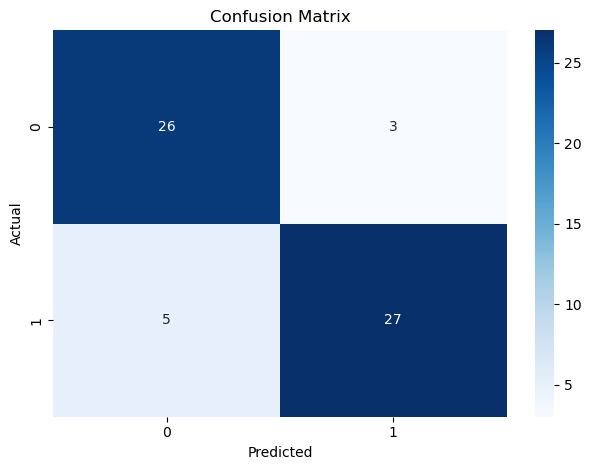

In [64]:
# 10. 평가
print("\n[Classification Report]")
print(classification_report(y_test, y_pred))

print("\n[Confusion Matrix]")
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

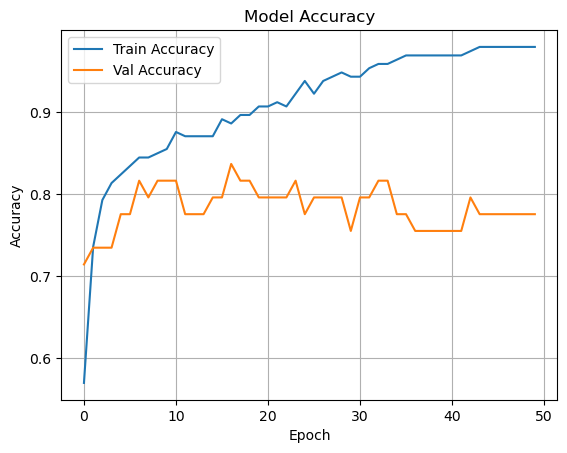

In [65]:
# 11. 정확도 시각화
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

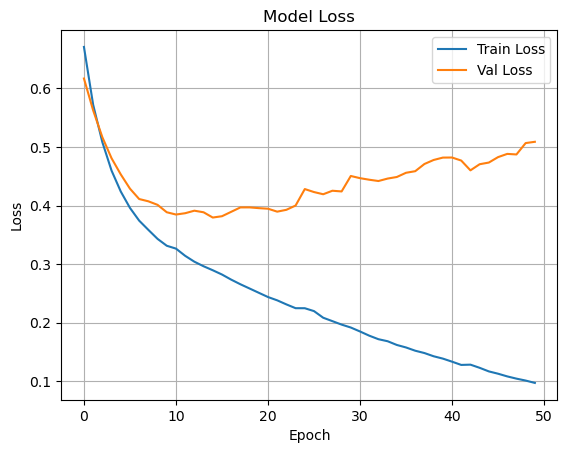

In [66]:
# 12. 손실 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()